In [1]:
import pandas as pd
import os




In [2]:
uniprot_raw_path = '../dataset/raw_dataset/ec_datasets/uniprot_raw'
split_ec_dataset_save_path = '../dataset/raw_dataset/ec_datasets/split_ec_dataset'
ecreact_dataset_path =  os.path.join(os.path.dirname(uniprot_raw_path), 'ecreact-1.0.csv')

ecreact_dataset = pd.read_csv(ecreact_dataset_path)
download_uniprot_dataset_path = os.path.join(uniprot_raw_path, 'uniprot-download_sequence_site_ec_clean.pkl')

download_uniprot_dataset = pd.read_pickle(download_uniprot_dataset_path)

train_download_uniprot_dataset = pd.read_pickle(os.path.join(split_ec_dataset_save_path, 'train_ec_uniprot_dataset_cluster_sample.pkl'))

validation_dataset = pd.read_pickle(os.path.join(split_ec_dataset_save_path, 'validation_ec_uniprot_dataset_cluster_sample.pkl'))

uniprot_test_dataset = pd.read_pickle(os.path.join(split_ec_dataset_save_path, 'test_ec_uniprot_dataset_cluster_sample.pkl'))



In [3]:
import subprocess

# 定义CD-HIT命令和参数

def run_subprocess_and_print(args):
    # 开启一个新的进程
    with subprocess.Popen(args, stdout=subprocess.PIPE, stderr=subprocess.PIPE, text=True) as proc:
        # 实时读取输出
        while True:
            output = proc.stdout.readline()
            if output == '' and proc.poll() is not None:
                break
            if output:
                print(output.strip())  # 输出每一行
        # 检查错误输出
        err = proc.stderr.read()
        if err:
            print("Error:", err)
    proc.communicate()

threshold = [0.8, 0.6, 0.4]
command = "/home/xiaoruiwang/software/cdhit/cd-hit"
for thre in threshold:
    if thre < 0.5:
        word = 2
    elif thre < 0.6:
        word = 3
    elif thre < 0.7:
        word = 4
    else:
        word = 5
    args = ["-i", os.path.abspath(os.path.join(uniprot_raw_path, 'all_sequence.fasta')),
            "-o", os.path.abspath(os.path.join(uniprot_raw_path, f'sequence_cutoff_{str(thre)}.fasta')), 
            "-c", str(thre),
            "-n", str(word),
            "-T", str(12)]
    print('Args: {}'.format(' '.join(args)))
    if not os.path.exists(os.path.abspath(os.path.join(uniprot_raw_path, f'sequence_cutoff_{str(thre)}.fasta'))):
        run_subprocess_and_print([command] + args)

Args: -i /home/xiaoruiwang/data/ubuntu_work_beta/single_step_work/EasIFA_v2/dataset/raw_dataset/ec_datasets/uniprot_raw/all_sequence.fasta -o /home/xiaoruiwang/data/ubuntu_work_beta/single_step_work/EasIFA_v2/dataset/raw_dataset/ec_datasets/uniprot_raw/sequence_cutoff_0.8.fasta -c 0.8 -n 5 -T 12
Args: -i /home/xiaoruiwang/data/ubuntu_work_beta/single_step_work/EasIFA_v2/dataset/raw_dataset/ec_datasets/uniprot_raw/all_sequence.fasta -o /home/xiaoruiwang/data/ubuntu_work_beta/single_step_work/EasIFA_v2/dataset/raw_dataset/ec_datasets/uniprot_raw/sequence_cutoff_0.6.fasta -c 0.6 -n 4 -T 12
Args: -i /home/xiaoruiwang/data/ubuntu_work_beta/single_step_work/EasIFA_v2/dataset/raw_dataset/ec_datasets/uniprot_raw/all_sequence.fasta -o /home/xiaoruiwang/data/ubuntu_work_beta/single_step_work/EasIFA_v2/dataset/raw_dataset/ec_datasets/uniprot_raw/sequence_cutoff_0.4.fasta -c 0.4 -n 2 -T 12


In [4]:
from collections import defaultdict
def get_cluster(cluster_results_path):
    results = defaultdict(list)
    with open(cluster_results_path, 'r', encoding='utf-8') as f:
        data = [x.strip() for x in f.readlines()]
    for line in data:
        if '>Cluster' in line:
            cluster = line.replace('>', '')
            continue
        alphadb_id = line.split('>')[-1].split('.')[0]
        results[cluster].append(alphadb_id)
    return results


def id2cluster(cluster_results:dict):
    alphafold_id2cluster = {}
    for key in cluster_results:
        for id in cluster_results[key]:
            alphafold_id2cluster[id] = key
    return alphafold_id2cluster


In [5]:
threshold = [0.8, 0.6, 0.4]
alphafold_id2cluster_all_levels = {}
cluster_all_levels2alphafold_id = {}
for thre in threshold:
    cluster_results_path = os.path.abspath(os.path.join(uniprot_raw_path, f'sequence_cutoff_{str(thre)}.fasta.clstr'))
    cluster_results = get_cluster(cluster_results_path)
    print(len(cluster_results))
    alphafold_id2cluster_all_levels[thre] = id2cluster(cluster_results)
    cluster_all_levels2alphafold_id[thre] = cluster_results

92745
52205
20173


In [6]:
alphafold_id2cluster_all_levels[thre]

{'Q5TA45': 'Cluster 0',
 'Q3MHC2': 'Cluster 0',
 'Q9VAH9': 'Cluster 0',
 'Q9CWS4': 'Cluster 0',
 'Q503E1': 'Cluster 0',
 'P0DKX1': 'Cluster 0',
 'P32185': 'Cluster 0',
 'Q2YDM2': 'Cluster 0',
 'P20732': 'Cluster 0',
 'Q5ZIH0': 'Cluster 0',
 'P81343': 'Cluster 0',
 'Q5NVE6': 'Cluster 0',
 'O43272': 'Cluster 1',
 'Q9WU79': 'Cluster 1',
 'Q148G5': 'Cluster 1',
 'P55736': 'Cluster 1',
 'P84812': 'Cluster 1',
 'Q8NHQ9': 'Cluster 2',
 'Q8JHJ2': 'Cluster 2',
 'Q6ZPL9': 'Cluster 2',
 'P0C2D3': 'Cluster 2',
 'Q9FLB0': 'Cluster 2',
 'Q8GXD6': 'Cluster 2',
 'P19662': 'Cluster 2',
 'P80055': 'Cluster 2',
 'P81528': 'Cluster 2',
 'Q5ZLN8': 'Cluster 2',
 'Q6AZV7': 'Cluster 2',
 'P0CAT0': 'Cluster 2',
 'P85441': 'Cluster 2',
 'P56948': 'Cluster 2',
 'P81419': 'Cluster 2',
 'Q9M2Z3': 'Cluster 3',
 'P0CC16': 'Cluster 3',
 'P0DI85': 'Cluster 3',
 'Q96LT4': 'Cluster 4',
 'Q9DA37': 'Cluster 4',
 'Q9VS60': 'Cluster 4',
 'P0C0N0': 'Cluster 4',
 'P18692': 'Cluster 4',
 'P41833': 'Cluster 5',
 'P0DJJ1': 'Clus

In [7]:
max_sample = 100            # 控制生成数据的上限
merge_dataset_name_str = 'uniprot_ecreact_cluster_split_merge_dataset_limit_'
ec_site_dataset_path = '../dataset/ec_site_dataset/'

In [8]:
from tqdm import tqdm
import pandas as pd
import os
from tqdm.auto import tqdm
from pandarallel import pandarallel
from rdkit import Chem
from tqdm import tqdm as top_tqdm
def get_dataset(max_sample, ec_site_dataset_path=ec_site_dataset_path,  
                merge_dataset_name_str='uniprot_ecreact_merge_dataset_limit_', 
                sub_set=['train', 'valid', 'test']):
    
    uniprot_ecreact_merge_dataset_path = os.path.join(ec_site_dataset_path, f'{merge_dataset_name_str}{max_sample}')
    dataset = pd.DataFrame()

    for dataset_flag in sub_set:
        folder_path = os.path.join(uniprot_ecreact_merge_dataset_path, f'{dataset_flag}_dataset')
        csv_fnames = os.listdir(folder_path)
        pbar = tqdm(
            csv_fnames,
            total=len(csv_fnames),
            desc=f'{dataset_flag}'
        )


        for fname in pbar:
            df = pd.read_csv(os.path.join(folder_path, fname))
            # df = df[['alphafolddb-id', 'aa_sequence']]
            dataset = pd.concat([dataset, df])
            

    # info_df = info_df.drop_duplicates(subset=['alphafolddb-id', 'aa_sequence']).reset_index(drop=True)
    return dataset
def get_structure_sequence(pdb_file):
    try:
        mol = Chem.MolFromPDBFile(pdb_file)
        protein_sequence = Chem.MolToSequence(mol)
    except:
        protein_sequence = ''
    return protein_sequence
def multiprocess_structure_check(df, nb_workers, pdb_file_path):
    
    if nb_workers != 0:

        pandarallel.initialize(nb_workers=nb_workers, progress_bar=True)
        df['pdb_files'] = df['alphafolddb-id'].parallel_apply(
            lambda x: os.path.join(pdb_file_path, f'AF-{x}-F1-model_v4.pdb'))
        df['aa_sequence_calculated'] = df['pdb_files'].parallel_apply(
            lambda x: get_structure_sequence(x))
    else:
        top_tqdm.pandas(desc='pandas bar')
        df['pdb_files'] = df['alphafolddb-id'].progress_apply(
            lambda x: os.path.join(pdb_file_path, f'AF-{x}-F1-model_v4.pdb'))
        df['aa_sequence_calculated'] = df['pdb_files'].progress_apply(
            lambda x: get_structure_sequence(x))
    
    df['is_valid'] = (df['aa_sequence_calculated'] == df['aa_sequence'])

    return df
def get_query_database(path, fasta_path, pdb_file_path):
    database_df = pd.read_csv(path)
    database_df = database_df[['alphafolddb-id', 'aa_sequence','site_labels', 'site_types']]
    database_df['alphafolddb-id'] = database_df['alphafolddb-id'].apply(lambda x:x.replace(';',''))
    
    database_df = multiprocess_structure_check(database_df, nb_workers=12, pdb_file_path=pdb_file_path)
    
    write_database_df = database_df.drop_duplicates(subset=['alphafolddb-id', 'aa_sequence','site_labels', 'site_types']).reset_index(drop=True)


    with open(fasta_path, 'w', encoding='utf-8') as f:
        for idx, row in tqdm(write_database_df.iterrows(), total=len(write_database_df)):
            f.write('>{}\n'.format(row['alphafolddb-id']))
            f.write('{}\n'.format(row['aa_sequence']))
    return database_df

In [9]:
train_dataset = get_dataset(max_sample, ec_site_dataset_path=ec_site_dataset_path, merge_dataset_name_str=merge_dataset_name_str, sub_set=['train'])
# test_dataset = get_dataset(max_sample, ec_site_dataset_path=ec_site_dataset_path, merge_dataset_name_str=merge_dataset_name_str, sub_set=['test'])

dataset_path = os.path.join(ec_site_dataset_path, f'{merge_dataset_name_str}{max_sample}')
test_dataset = get_query_database(os.path.join(dataset_path, 'test_dataset', 'uniprot_ecreact_merge.csv'), fasta_path=os.path.join(dataset_path, 'test_dataset.fasta'), pdb_file_path=os.path.join(os.path.dirname(dataset_path), 'structures', 'alphafolddb_download'))
test_dataset = test_dataset.loc[test_dataset['is_valid']]
test_dataset

train:   0%|          | 0/2595 [00:00<?, ?it/s]

INFO: Pandarallel will run on 12 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


  0%|          | 0/853 [00:00<?, ?it/s]

,alphafolddb-id,aa_sequence,site_labels,site_types,pdb_files,aa_sequence_calculated,is_valid
0,A0A1S7LCW6,MKLKGTTIVALGMLVVAIMVLASMIDLPGSDMSATPAPPDTPRGAP...,"[[206], [212], [215], [216], [246], [252], [25...","[0, 0, 0, 0, 0, 0, 0, 0]",../dataset/ec_site_dataset/structures/alphafol...,MKLKGTTIVALGMLVVAIMVLASMIDLPGSDMSATPAPPDTPRGAP...,True
1,Q9F0J6,MQATKIIDGFHLVGAIDWNSRDFHGYTLSPMGTTYNAYLVEDEKTT...,"[[79], [81], [83], [146], [165], [165], [226]]","[0, 0, 0, 0, 0, 0, 0]",../dataset/ec_site_dataset/structures/alphafol...,MQATKIIDGFHLVGAIDWNSRDFHGYTLSPMGTTYNAYLVEDEKTT...,True
2,Q5BEJ7,MADHEQEQEPLSIAIIGGGIIGLMTALGLLHRNIGKVTIYERASAW...,"[[41, 42], [245, 247], [320], [330, 334]]","[0, 0, 0, 0]",../dataset/ec_site_dataset/structures/alphafol...,MADHEQEQEPLSIAIIGGGIIGLMTALGLLHRNIGKVTIYERASAW...,True
3,Q9HUH4,MPQALSTDILIVGGGIAGLWLNARLRRAGYATVLVESASLGGGQSV...,"[[17], [36], [44, 45], [49, 51], [346, 347]]","[0, 0, 0, 0, 0]",../dataset/ec_site_dataset/structures/alphafol...,MPQALSTDILIVGGGIAGLWLNARLRRAGYATVLVESASLGGGQSV...,True
4,P96692,MAEFTHLVNERRSASNFLSGHPITKEDLNEMFELVALAPSAFNLQH...,"[[11, 13], [68, 70], [157, 158], [193], [196]]","[0, 0, 0, 0, 0]",../dataset/ec_site_dataset/structures/alphafol...,MAEFTHLVNERRSASNFLSGHPITKEDLNEMFELVALAPSAFNLQH...,True
...,...,...,...,...,...,...,...
889,O30144,MFLKVRAEKRLGNFRLNVDFEMGRDYCVLLGPTGAGKSVFLELIAG...,"[[31, 38]]",[0],../dataset/ec_site_dataset/structures/alphafol...,MFLKVRAEKRLGNFRLNVDFEMGRDYCVLLGPTGAGKSVFLELIAG...,True
890,P28737,MSRKFDLKTITDLSVLVGTGISLYYLVSRLLNDVESGPLSGKSRES...,"[[133, 140]]",[0],../dataset/ec_site_dataset/structures/alphafol...,MSRKFDLKTITDLSVLVGTGISLYYLVSRLLNDVESGPLSGKSRES...,True
891,P37093,MTEMVISPAERQSIRRLPFSFANRFKLVLDWNEDFSQASIYYLAPL...,"[[397], [400], [430], [433]]","[0, 0, 0, 0]",../dataset/ec_site_dataset/structures/alphafol...,MTEMVISPAERQSIRRLPFSFANRFKLVLDWNEDFSQASIYYLAPL...,True
892,P94360,MAELRMEHIYKFYDQKEPAVDDFNLHIADKEFIVFVGPSGCGKSTT...,"[[37, 44]]",[0],../dataset/ec_site_dataset/structures/alphafol...,MAELRMEHIYKFYDQKEPAVDDFNLHIADKEFIVFVGPSGCGKSTT...,True


In [10]:
for thre in threshold:
    train_dataset[f'cluster_ther_{str(thre)}'] = train_dataset['alphafolddb-id'].apply(lambda x:alphafold_id2cluster_all_levels[thre][x.replace(';', '')])
    test_dataset[f'cluster_ther_{str(thre)}'] = test_dataset['alphafolddb-id'].apply(lambda x:alphafold_id2cluster_all_levels[thre][x.replace(';', '')])

In [11]:
train_dataset.head()

,reaction,ec,pdb-id,alphafolddb-id,aa_sequence,site_labels,site_types,cluster_ther_0.8,cluster_ther_0.6,cluster_ther_0.4
0,Cc1cc2c(cc1C)N(C[C@H](O)[C@H](O)[C@H](O)COP(=O...,1.14.14.140,NaN,P93149;,MEPQLVAVSVLVSALICYFFFRPYFHRYGKNLPPSPFFRLPIIGHM...,[[448]],[0],Cluster 6840,Cluster 4164,Cluster 2164
0,CC(=O)CC(=O)SCCNC(=O)CCNC(=O)[C@H](O)C(C)(C)CO...,1.1.1.36,1UZL;1UZM;1UZN;2NTN;,P9WGT3;,MTATATEGAKPPFVSRSVLVTGGNRGIGLAIAQRLAADGHKVAVTH...,"[[25, 27], [47], [61, 62], [90], [153], [157],...","[0, 0, 0, 0, 0, 0, 0, 0, 1, 2]",Cluster 65688,Cluster 37029,Cluster 11185
1,CC[C@@H](O)CC(=O)SCCNC(=O)CCNC(=O)[C@H](O)C(C)...,1.1.1.36,1UZL;1UZM;1UZN;2NTN;,P9WGT3;,MTATATEGAKPPFVSRSVLVTGGNRGIGLAIAQRLAADGHKVAVTH...,"[[25, 27], [47], [61, 62], [90], [153], [157],...","[0, 0, 0, 0, 0, 0, 0, 0, 1, 2]",Cluster 65688,Cluster 37029,Cluster 11185
2,CC[C@@H](O)CC(=O)SCCNC(=O)CCNC(=O)[C@H](O)C(C)...,1.1.1.36,1UZL;1UZM;1UZN;2NTN;,P9WGT3;,MTATATEGAKPPFVSRSVLVTGGNRGIGLAIAQRLAADGHKVAVTH...,"[[25, 27], [47], [61, 62], [90], [153], [157],...","[0, 0, 0, 0, 0, 0, 0, 0, 1, 2]",Cluster 65688,Cluster 37029,Cluster 11185
3,CC(=O)CC(=O)SCCNC(=O)CCNC(=O)[C@H](O)C(C)(C)CO...,1.1.1.36,1UZL;1UZM;1UZN;2NTN;,P9WGT3;,MTATATEGAKPPFVSRSVLVTGGNRGIGLAIAQRLAADGHKVAVTH...,"[[25, 27], [47], [61, 62], [90], [153], [157],...","[0, 0, 0, 0, 0, 0, 0, 0, 1, 2]",Cluster 65688,Cluster 37029,Cluster 11185


In [12]:
test_dataset.head()

,alphafolddb-id,aa_sequence,site_labels,site_types,pdb_files,aa_sequence_calculated,is_valid,cluster_ther_0.8,cluster_ther_0.6,cluster_ther_0.4
0,A0A1S7LCW6,MKLKGTTIVALGMLVVAIMVLASMIDLPGSDMSATPAPPDTPRGAP...,"[[206], [212], [215], [216], [246], [252], [25...","[0, 0, 0, 0, 0, 0, 0, 0]",../dataset/ec_site_dataset/structures/alphafol...,MKLKGTTIVALGMLVVAIMVLASMIDLPGSDMSATPAPPDTPRGAP...,True,Cluster 64304,Cluster 36236,Cluster 14029
1,Q9F0J6,MQATKIIDGFHLVGAIDWNSRDFHGYTLSPMGTTYNAYLVEDEKTT...,"[[79], [81], [83], [146], [165], [165], [226]]","[0, 0, 0, 0, 0, 0, 0]",../dataset/ec_site_dataset/structures/alphafol...,MQATKIIDGFHLVGAIDWNSRDFHGYTLSPMGTTYNAYLVEDEKTT...,True,Cluster 27949,Cluster 15695,Cluster 7204
2,Q5BEJ7,MADHEQEQEPLSIAIIGGGIIGLMTALGLLHRNIGKVTIYERASAW...,"[[41, 42], [245, 247], [320], [330, 334]]","[0, 0, 0, 0]",../dataset/ec_site_dataset/structures/alphafol...,MADHEQEQEPLSIAIIGGGIIGLMTALGLLHRNIGKVTIYERASAW...,True,Cluster 20095,Cluster 11592,Cluster 3039
3,Q9HUH4,MPQALSTDILIVGGGIAGLWLNARLRRAGYATVLVESASLGGGQSV...,"[[17], [36], [44, 45], [49, 51], [346, 347]]","[0, 0, 0, 0, 0]",../dataset/ec_site_dataset/structures/alphafol...,MPQALSTDILIVGGGIAGLWLNARLRRAGYATVLVESASLGGGQSV...,True,Cluster 30288,Cluster 17020,Cluster 7747
4,P96692,MAEFTHLVNERRSASNFLSGHPITKEDLNEMFELVALAPSAFNLQH...,"[[11, 13], [68, 70], [157, 158], [193], [196]]","[0, 0, 0, 0, 0]",../dataset/ec_site_dataset/structures/alphafol...,MAEFTHLVNERRSASNFLSGHPITKEDLNEMFELVALAPSAFNLQH...,True,Cluster 77970,Cluster 43945,Cluster 17516


In [13]:
similarity_index_levels = ['0~40%', '40~60%', '60~80%']
def get_similarity_index_level(level1_cls, level2_cls, level3_cls, train_dataset):

    if (level3_cls not in train_dataset['cluster_ther_0.4'].tolist()):  # 在0.4阈值下与训练集没有相同的cluster，则代表相似度小于0.4
        return similarity_index_levels[0]  # 0~0.4
    else: # 在0.4阈值下，与训练集有相同的cluster，则相似度大于0.4
        if (level2_cls not in train_dataset['cluster_ther_0.6'].tolist()): # 在0.6阈值下与训练集没有相同的cluster，则代表相似度小于0.6
            return similarity_index_levels[1] # 0.4~0.6
        else:
            return similarity_index_levels[2] # 0.6~0.8

In [14]:
test_dataset['similarity_index_level'] = test_dataset.apply(lambda row: get_similarity_index_level(row['cluster_ther_0.8'], row['cluster_ther_0.6'], row['cluster_ther_0.4'], train_dataset), axis=1)

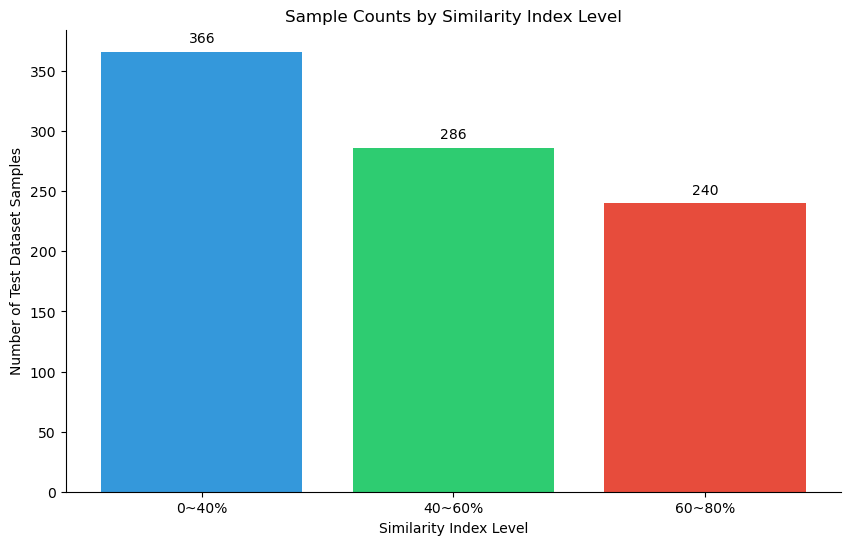

In [15]:
import matplotlib.pyplot as plt


thresholds = similarity_index_levels
sample_counts = [(test_dataset['similarity_index_level'] == x).sum() for x in thresholds]



colors = ['#3498db', '#2ecc71', '#e74c3c']  


plt.figure(figsize=(10, 6)) 
plt.bar(thresholds, sample_counts, color=colors)
ax = plt.gca()  
ax.spines['top'].set_visible(False)  
ax.spines['right'].set_visible(False) 

plt.title('Sample Counts by Similarity Index Level')
plt.xlabel('Similarity Index Level')
plt.ylabel('Number of Test Dataset Samples')


for i, count in enumerate(sample_counts):
    plt.text(i, count + 5, str(count), ha='center', va='bottom')


plt.show()


In [16]:
test_dataset.to_csv(os.path.join(ec_site_dataset_path, merge_dataset_name_str+f'{max_sample}', 'test_dataset_with_similarity_idx.csv'), index=False)

In [17]:
cluster_all_levels2alphafold_id[0.8]

defaultdict(list,
            {'Cluster 0': ['Q5TA45',
              'Q3MHC2',
              'Q9CWS4',
              'Q503E1',
              'Q2YDM2',
              'Q5ZIH0',
              'Q5NVE6'],
             'Cluster 1': ['O43272', 'Q9WU79', 'Q148G5'],
             'Cluster 2': ['Q8NHQ9', 'Q6ZPL9', 'Q5ZLN8'],
             'Cluster 3': ['Q9M2Z3'],
             'Cluster 4': ['Q9VS60'],
             'Cluster 5': ['P41833'],
             'Cluster 6': ['Q10KY3'],
             'Cluster 7': ['Q20624', 'Q20624'],
             'Cluster 8': ['Q93W95'],
             'Cluster 9': ['P23219', 'O62664', 'P05979'],
             'Cluster 10': ['P96890', 'P46392'],
             'Cluster 11': ['T1RR71', 'T1RRL8', 'T1RRI8'],
             'Cluster 12': ['Q6AZT2'],
             'Cluster 13': ['V5NC32', 'Q3L243', 'Q0R4L2'],
             'Cluster 14': ['Q5W915', 'Q09WE7'],
             'Cluster 15': ['Q8J2T0'],
             'Cluster 16': ['P0CI73', 'E0U070', 'Q65P46'],
             'Cluster 17': ['P0DI76

In [18]:
import subprocess
tmscore_path='/home/xiaoruiwang/software/TMalign/TMscore'  # 替换为自己下载的TMscore路径
def calculate_tmscore(pdb_file1, pdb_file2, tmscore_path='TMscore'):
    """
    Calculate the TMscore for two PDB files using the TMscore program.
    
    Args:
    pdb_file1 (str): Path to the first PDB file.
    pdb_file2 (str): Path to the second PDB file.    默认的标准化基准
    tmscore_path (str): Path to the TMscore executable.
    
    Returns:
    float: The TMscore of the two PDB structures.
    """
    # 构建命令行命令
    command = [tmscore_path, pdb_file1, pdb_file2]
    
    # 调用 subprocess.run 来执行 TMscore
    result = subprocess.run(command, stdout=subprocess.PIPE, text=True)
    
    # 解析输出，查找TM-score
    tmscore = None
    for line in result.stdout.split('\n'):
        if line.strip().startswith('TM-score'):
            # print(line.strip())
            parts = line.split('=')
            if len(parts) > 1:
                tmscore = float(parts[1].split()[0])
                break
    
    return tmscore

# 调用函数
# pdb1 = "/home/xiaoruiwang/software/TMalign/PDB2.pdb"
# pdb2 = "/home/xiaoruiwang/software/TMalign/PDB1.pdb"
# tmscore = calculate_tmscore(tmscore_path='/home/xiaoruiwang/software/TMalign/TMscore',pdb_file1=pdb1, pdb_file2=pdb2)
# print("Calculated TMscore:", tmscore)


In [19]:
def get_structure_TMScore(row, train_dataset, pdb_path='../dataset/ec_site_dataset/structures/alphafolddb_download'):
    alphafold_id = row['alphafolddb-id'].replace(';', '')
    most_similar_train_id = []
    for cluster_ther in ['cluster_ther_0.8', 'cluster_ther_0.6', 'cluster_ther_0.4']:
        most_similar_train_id.extend(train_dataset.loc[train_dataset[cluster_ther] == row[cluster_ther]]['alphafolddb-id'].tolist())
        if len(most_similar_train_id) != 0:
            break # 只取序列最相似的去比较结构相似的
    train_pdb_names = [os.path.abspath(os.path.join(pdb_path, 'AF-{}-F1-model_v4.pdb'.format(alphafold_id.replace(';', '')))) for alphafold_id in most_similar_train_id]
    test_pdb_name = os.path.abspath(os.path.join(pdb_path, f'AF-{alphafold_id}-F1-model_v4.pdb'))
    max_tmscore = 0
    for train_pdb_name in train_pdb_names:
        tmscore = calculate_tmscore(train_pdb_name, test_pdb_name, tmscore_path=tmscore_path)
        if max_tmscore < tmscore:
            max_tmscore = tmscore
    # if max_tmscore > 0.5: print(f'TM-score >0.5 in {alphafold_id}')
    return max_tmscore

In [20]:
tqdm.pandas()
test_dataset['max_tmscore'] = test_dataset.progress_apply(lambda row:get_structure_TMScore(row, train_dataset), axis=1)

  0%|          | 0/892 [00:00<?, ?it/s]

TM-score >0.5 in Q5BEJ7
TM-score >0.5 in A5CAL1
TM-score >0.5 in Q59787
TM-score >0.5 in Q4DJ07
TM-score >0.5 in P42327
TM-score >0.5 in O67610
TM-score >0.5 in P11759
TM-score >0.5 in Q59787
TM-score >0.5 in Q76L37
TM-score >0.5 in P17618
TM-score >0.5 in P75691
TM-score >0.5 in P50098
TM-score >0.5 in Q0P8H3
TM-score >0.5 in Q606Q2
TM-score >0.5 in Q5KWX7
TM-score >0.5 in A5CAL1
TM-score >0.5 in P50933
TM-score >0.5 in A9BGZ9
TM-score >0.5 in Q54UF7
TM-score >0.5 in O83080
TM-score >0.5 in Q5SIJ1
TM-score >0.5 in P33312
TM-score >0.5 in Q6V4H0
TM-score >0.5 in P06632
TM-score >0.5 in P14697
TM-score >0.5 in Q65T37
TM-score >0.5 in Q64BR7
TM-score >0.5 in Q9I5I6
TM-score >0.5 in C0KTJ6
TM-score >0.5 in P28834
TM-score >0.5 in Q977U7
TM-score >0.5 in P48828
TM-score >0.5 in A5CAL1
TM-score >0.5 in P25984
TM-score >0.5 in Q9WZ26
TM-score >0.5 in Q9ZBU1
TM-score >0.5 in P07788
TM-score >0.5 in P00502
TM-score >0.5 in P33912
TM-score >0.5 in Q9UR19
TM-score >0.5 in O52762
TM-score >0.5 in

In [21]:
(test_dataset['max_tmscore'] > 0.5).sum()

332

In [22]:
(test_dataset['max_tmscore'] < 0.17).sum()

394

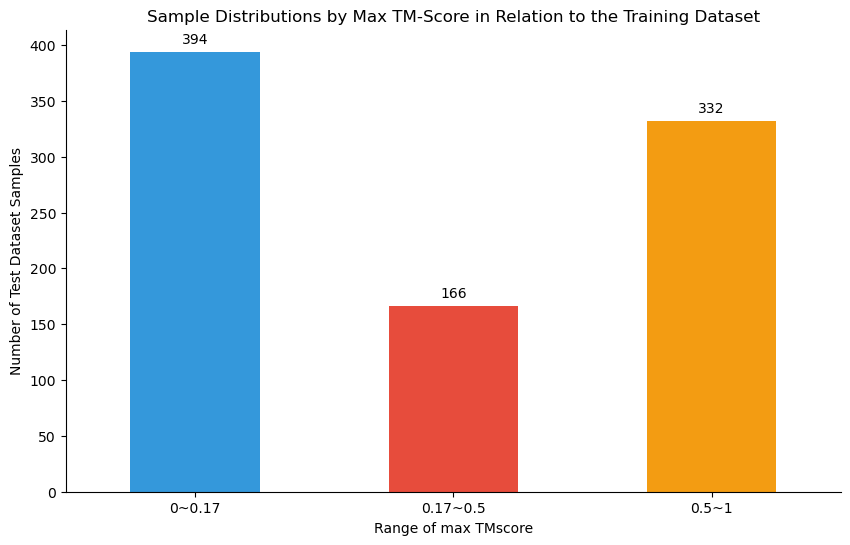

In [23]:
bins = [0, 0.17, 0.5, 1]
labels = ['0~0.17', '0.17~0.5', '0.5~1']
test_dataset['range'] = pd.cut(test_dataset['max_tmscore'], bins=bins, labels=labels, right=False)
count_series = test_dataset['range'].value_counts().reindex(labels)

# 绘制柱状图
plt.figure(figsize=(10, 6)) 
ax = count_series.plot(kind='bar', color=['#3498db', '#e74c3c', '#f39c12'])
ax.spines['top'].set_visible(False)  
ax.spines['right'].set_visible(False) 
for i, count in enumerate(count_series):
    plt.text(i, count + 5, str(count), ha='center', va='bottom')
plt.title('Sample Distributions by Max TM-Score in Relation to the Training Dataset')
plt.xlabel('Range of max TMscore')
plt.ylabel('Number of Test Dataset Samples')
plt.xticks(rotation=0)
# plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [24]:
test_dataset.to_csv(os.path.join(ec_site_dataset_path, merge_dataset_name_str+f'{max_sample}', 'test_dataset_with_similarity_idx.csv'), index=False)
# 注释防止文件被意外覆盖